## Data Cleaning and Imputation 

## Work By-

### Ravjot Singh

- LinkedIn: https://www.linkedin.com/in/ravjot03/
- Github: https://github.com/Ravjot03
- Medium: https://ravjot03.medium.com/
- Email: ravjot313@gmail.com
- Mobile: +1(341)-345-1373 (USA) 
- Location: San Francisco, California, USA 

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the data

In [2]:
df = pd.read_csv('planes.csv')

Initial Exploration of data

In [3]:
df.shape

(10660, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


In [5]:
df.describe()

,Price
count,10044.000000
mean,9044.411191
std,4472.304869
min,1759.000000
25%,5276.750000
50%,8366.000000
75%,12373.000000
max,54826.000000


In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


A. Dealing with missing data

It is important to deal with missing data before starting the data analysis.

First approach is to drop missing values if they account for a small proportion, typically 5% of our data.

In [7]:
# Print the number of missing values in each column of the DataFrame.
df.isna().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

In [8]:
# Find the 5% threshold for our dataset
threshold = len(df) * 0.05
threshold

533.0

In [9]:
# Creating a filter
cols_to_drop = df.columns[df.isna().sum() <= threshold]

# Drop missing values for columns which are below the threshold
df.dropna(subset=cols_to_drop, inplace=True)

print(df.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


Conclusion - By creating a missing values threshold and using it to filter columns, we have managed to remove missing values from all columns except for "Additional_Info" and "Price".

Strategies for remaining missing data

The 5% rule has worked nicely for our planes dataset, eliminating missing values from 9 out of 11 columns.

Now, we need to decide what to do with the "Additional_Info" and "Price" columns, which are missing 300 and 368 values respectively.

We will first take a look at what "Additional_Info" contains, then visualize the price of plane tickets by different airlines.

In [10]:
# Check the values of the Additional_Info column
print(df.Additional_Info.value_counts())

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


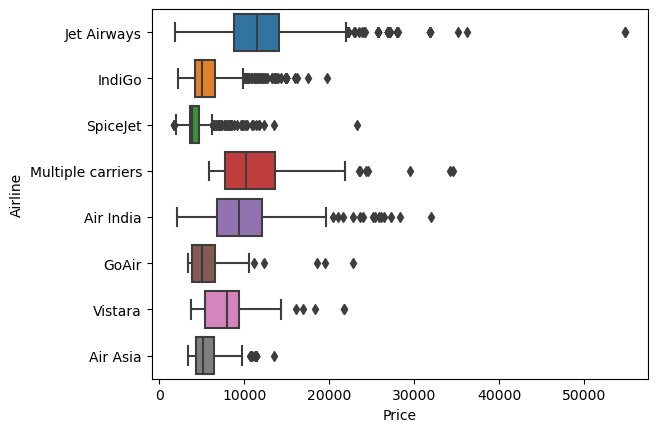

In [11]:
# Create a box plot of Price by Airline
sns.boxplot(data=df, y='Airline', x='Price')

plt.show()

Conclusion - By having a look on above two steps we can conclude by removing the "Additional_Info" column and impute the median by Airline for missing values of "Price".

In [12]:
# Dropping "Additional_Info" column from the dataset using df.drop() function from pandas
df = df.drop('Additional_Info', axis=1)

Now there's just one column with missing values left.

We have removed the "Additional_Info" column from dataset .The last step is to impute the missing data in the "Price" column of the dataset.

As we generated boxplot above, which suggests that imputing the median price based on the "Airline" is a solid approach for missing values of "Price" column.

In [13]:
# Calculating median plane ticket prices by Airline
airline_prices = df.groupby("Airline")["Price"].median()

print(airline_prices)

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


In [14]:
# Converting to a dictionary
prices_dict = airline_prices.to_dict()
prices_dict

{'Air Asia': 5192.0,
 'Air India': 9443.0,
 'GoAir': 5003.5,
 'IndiGo': 5054.0,
 'Jet Airways': 11507.0,
 'Multiple carriers': 10197.0,
 'SpiceJet': 3873.0,
 'Vistara': 8028.0}

In [15]:
# Mapping the dictionary to missing values of Price by Airline
df["Price"] = df["Price"].fillna(df["Airline"].map(prices_dict))

# Check for missing values
print(df.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


B. Finding the number of unique values

We can practice some of the categorical data manipulation and analysis skills, to help identify which data could be reformatted to extract value.

In [16]:
# Filter the DataFrame for object columns
non_numeric = df.select_dtypes("object")

# Looping through columns
for cols in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {cols} column: ", non_numeric[cols].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5


Flight duration categories

As we can see above, there are 362 unique values in the "Duration" column of planes

Looks like this won't be simple to convert to numbers. However, we could categorize flights by duration and examine the frequency of different flight lengths.

Also, creating a "Duration_Category" column in the DataFrame.

In [17]:
# Creating a list of categories
flight_categories = ['Short-haul','Medium','Long-haul']

In [18]:
# Creating a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short_flights
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium_flights
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long_flights
long_flights = "10h|11h|12h|13h|14h|15h|16h"

Adding duration categories

Now that we have set up the categories and values we want to capture, it's time to build a new column to analyze the frequency of flights by duration!

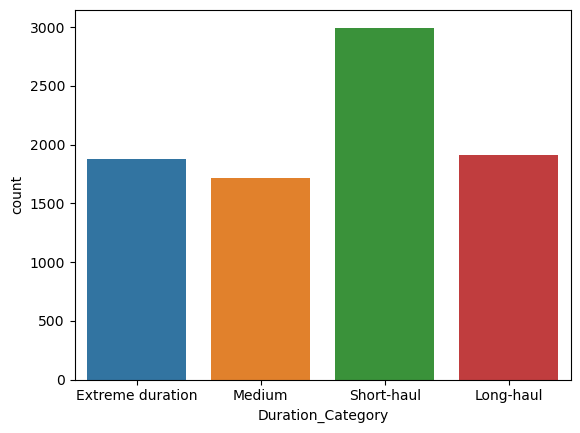

In [19]:
# Creating conditions for values in flight_categories to be created
conditions = [
    (df["Duration"].str.contains(short_flights)),
    (df["Duration"].str.contains(medium_flights)),
    (df["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
df["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=df, x="Duration_Category")
plt.show()

C. Working with Numeric data

Flight duration

Analyzing the duration of flights, but unfortunately, the "Duration" column in the planes DataFrame currently contains string values.

In [20]:
# Remove the string character
df["Duration"] = df['Duration'].str.replace('h','')

In [21]:
df['Duration'] = df['Duration'].str.replace('m', '')

In [22]:
df['Duration'] = df['Duration'].str.split().str[0]

In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Duration_Category
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19,2 stops,13882.0,Extreme duration
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5,1 stop,6218.0,Medium
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4,1 stop,13302.0,Short-haul
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2,non-stop,3873.0,Short-haul
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15,1 stop,11087.0,Long-haul


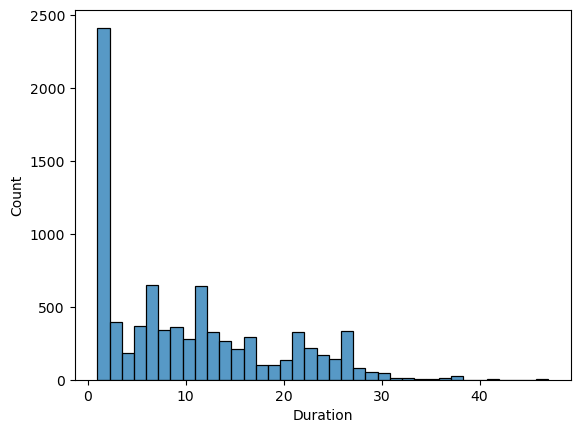

In [24]:
# Converting to float data type
df["Duration"] = df["Duration"].astype(float)

# Plot a histogram
sns.histplot(data=df, x = 'Duration')
plt.show()

Adding descriptive statistics

Now "Duration" and "Price" both contain numeric values in the DataFrame, we can calculate summary statistics for them that are conditional on values in other columns.

In [25]:
# Price standard deviation by Airline
df["airline_price_st_dev"] = df.groupby("Airline")["Price"].transform(lambda x: x.std())

print(df[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4159.846432             3082
IndiGo             2245.529140             1632
Air India          3692.609285             1399
Multiple carriers  3558.323763              959
SpiceJet           1798.900648              653
Vistara            2888.915498              376
Air Asia           1979.826234              260
GoAir              2764.926625              147
Name: count, dtype: int64


In [26]:
# Median Duration by Airline
df["airline_median_duration"] = df.groupby("Airline")["Duration"].transform(lambda x: x.median())

print(df[["Airline","airline_median_duration"]].value_counts())

Airline            airline_median_duration
Jet Airways        13.0                       3082
IndiGo             2.0                        1632
Air India          15.0                       1399
Multiple carriers  10.0                        959
SpiceJet           2.0                         653
Vistara            3.0                         376
Air Asia           2.0                         260
GoAir              2.0                         147
Name: count, dtype: int64


In [27]:
# Mean Price by Destination
df["price_destination_mean"] = df.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(df[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10473.585927              3631
Banglore     9093.622872               2291
Delhi        5248.541082                998
New Delhi    11579.306944               720
Hyderabad    5190.274021                562
Kolkata      4907.156863                306
Name: count, dtype: int64


D. Identifying outliers

We have proven that we can recognize what to do when presented with outliers, but can we identify them using visualizations?

So, now we are trying to figure out if there are any outliers in the "Price" or "Duration" columns of the DataFrame.

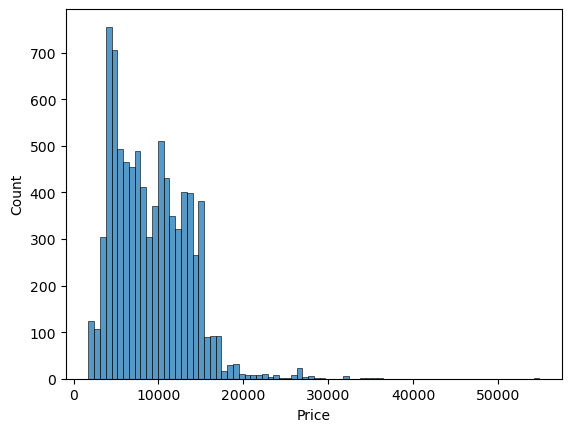

count    8508.000000
mean       10.256465
std         8.499998
min         1.000000
25%         2.000000
50%         8.000000
75%        15.000000
max        47.000000
Name: Duration, dtype: float64


In [28]:
# Plot a histogram of flight prices
sns.histplot(data=df, x="Price")
plt.show()

# Display descriptive statistics for flight duration
print(df['Duration'].describe())

Removing outliers

While removing outliers isn't always the way to go, for our analysis, we've decided that you will only include flights where the "Price" is not an outlier.

Therefore for this, we need to find the upper threshold and then use it to remove values above this from our dataset.

In [29]:
# Finding the 75th and 25th percentiles
price_seventy_fifth = df["Price"].quantile(0.75)
price_twenty_fifth = df["Price"].quantile(0.25)

# Calculating IQR
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculating the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subsetting the data
df = df[(df["Price"] > lower) & (df["Price"] < upper)]

print(df["Price"].describe())

count     8438.000000
mean      8877.466046
std       4001.838236
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64


Finally, we managed to create thresholds based on the IQR and used them to filter the dataset to eliminate extreme prices. 

Originally the dataset had a maximum price of almost 55000, but the above output shows that the maximum has been reduced to around 22270, reflecting a less skewed distribution for the analysis.